<a href="https://colab.research.google.com/github/JaskaranKaurGill/Companion-Chatbot/blob/master/Using_Titles_BioBERT_CLassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1R84voFKHfWV9xjzeLzWBbmY1uOMYpnyD' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1R84voFKHfWV9xjzeLzWBbmY1uOMYpnyD" -O biobert_weights && rm -rf /tmp/cookies.txt

--2021-11-28 11:38:00--  https://docs.google.com/uc?export=download&confirm=H9h5&id=1R84voFKHfWV9xjzeLzWBbmY1uOMYpnyD
Resolving docs.google.com (docs.google.com)... 108.177.111.113, 108.177.111.100, 108.177.111.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.111.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-68-docs.googleusercontent.com/docs/securesc/4541ta5g0o0hkta4gmv4dilv2ubqjcl9/rfpfk1e8l2t76cribfvt9l6o5mc0oikb/1638099450000/13799006341648886493/04682528429876795100Z/1R84voFKHfWV9xjzeLzWBbmY1uOMYpnyD?e=download [following]
--2021-11-28 11:38:00--  https://doc-14-68-docs.googleusercontent.com/docs/securesc/4541ta5g0o0hkta4gmv4dilv2ubqjcl9/rfpfk1e8l2t76cribfvt9l6o5mc0oikb/1638099450000/13799006341648886493/04682528429876795100Z/1R84voFKHfWV9xjzeLzWBbmY1uOMYpnyD?e=download
Resolving doc-14-68-docs.googleusercontent.com (doc-14-68-docs.googleusercontent.com)... 173.194.197.132, 2607:f8b0:4001:c1b::84
Conne

In [2]:
!pip install pytorch_transformers
!pip install transformers
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

     |████████████████████████████████| 176 kB 5.4 MB/s 
     |████████████████████████████████| 1.2 MB 42.9 MB/s 
     |████████████████████████████████| 895 kB 50.8 MB/s 
     |████████████████████████████████| 131 kB 48.3 MB/s 
     |████████████████████████████████| 8.2 MB 42.1 MB/s 
     |████████████████████████████████| 79 kB 7.4 MB/s 
     |████████████████████████████████| 138 kB 51.5 MB/s 
     |████████████████████████████████| 127 kB 52.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 3.1 MB 5.2 MB/s 
     |████████████████████████████████| 59 kB 6.5 MB/s 


In [3]:
!tar -xzf biobert_weights
!ls biobert_v1.1_pubmed/

bert_config.json			model.ckpt-1000000.index  vocab.txt
model.ckpt-1000000.data-00000-of-00001	model.ckpt-1000000.meta


In [4]:
!transformers-cli convert --model_type bert --tf_checkpoint biobert_v1.1_pubmed/model.ckpt-1000000 --config biobert_v1.1_pubmed/bert_config.json --pytorch_dump_output biobert_v1.1_pubmed/pytorch_model.bin

Building PyTorch model from configuration: BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.5",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

Converting TensorFlow checkpoint from /content/biobert_v1.1_pubmed/model.ckpt-1000000
Loading TF weight bert/embeddings/LayerNorm/beta with shape [768]
Loading TF weight bert/embeddings/LayerNorm/gamma with shape [768]
Loading TF weight bert/embeddings/position_embeddings with shape [512, 768]
Loading TF weight bert/embeddings/token_type_embeddings with shape [2, 768]
Loading TF weight bert/embeddings/word_embeddings with shape 

In [5]:
!ls biobert_v1.1_pubmed/
!mv biobert_v1.1_pubmed/bert_config.json biobert_v1.1_pubmed/config.json
!ls biobert_v1.1_pubmed/

bert_config.json			model.ckpt-1000000.meta
model.ckpt-1000000.data-00000-of-00001	pytorch_model.bin
model.ckpt-1000000.index		vocab.txt
config.json				model.ckpt-1000000.meta
model.ckpt-1000000.data-00000-of-00001	pytorch_model.bin
model.ckpt-1000000.index		vocab.txt


In [6]:
from pytorch_transformers import BertModel
model = BertModel.from_pretrained('biobert_v1.1_pubmed')

In [7]:
!ls

biobert_v1.1_pubmed  biobert_weights  sample_data


In [12]:
import pandas as pd
df = pd.read_excel('shuffled_final_df.xlsx')
df.head()
df = df[['Title','Abstract','target']]
df = df.dropna()

In [13]:
import re
def cleanText(text):
        
    text = text.replace('\\n','')
    text = text.replace('\\','')
    #text = text.replace('\t', '')
    #text = re.sub('\[(.*?)\]','',text) #removes [this one]
    text = re.sub('(http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?[a-z0-9]+([\-\.]{1}[a-z0-9]+)*\.[a-z]{2,5}(:[0-9]{1,5})?(\/.*)?\s',
                ' __url__ ',text) #remove urls
    #text = re.sub('\'','',text)
    #text = re.sub(r'\d+', ' __number__ ', text) #replaces numbers
    #text = re.sub('\W', ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.replace('\t', '')
    text = text.replace('\n', '')
    return text
Abstracts = []
for text in df['Abstract']:
    Abstracts.append(cleanText(text))

In [14]:
DATA_DIR="."
import os
import numpy as np
import pickle
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# install BERT
!pip install pytorch_pretrained_bert pytorch-nlp

# BERT imports
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# specify GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
#torch.cuda.get_device_name(0)

     |████████████████████████████████| 123 kB 5.2 MB/s 
     |████████████████████████████████| 90 kB 7.4 MB/s 


In [15]:
from sklearn.preprocessing import LabelEncoder

#sentiment is positive and negative we need to convert it to 0,1
le = LabelEncoder()
df["target"] = le.fit_transform(df["target"])

In [16]:
Abstracts = df['Title']

tokenizer = BertTokenizer.from_pretrained('biobert_v1.1_pubmed', do_lower_case=True)

tokenized_texts = list(map(lambda t: ['[CLS]']+tokenizer.tokenize(cleanText(t))+['[SEP]'] , Abstracts))
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

Tokenize the first sentence:
['[CLS]', 'activation', 'of', 'es', '##cher', '##ichi', '##a', 'co', '##li', 'r', '##rna', 'transcription', 'by', 'fi', '##s', 'during', 'a', 'growth', 'cycle', '[SEP]']


In [ ]:
how_many = 0
for abstract in df['Abstract']:
  if(len(cleanText(abstract))<=512):
    how_many = how_many + 1
print(how_many)

61


In [17]:
classes = list(df['target'])

In [18]:
max_len = 100
input_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, tokenized_texts)),
                          maxlen=max_len, dtype="long", truncating="post", padding="post")

In [19]:
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=max_len, dtype="long", truncating="post", padding="post")

In [20]:
len(input_ids[0])

100

In [21]:
attention_masks = []

for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

In [22]:
batch_size = 64

# Use train_test_split to split our data into train and validation sets for training
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, classes, 
                                                            random_state=2020, test_size=0.2)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2020, test_size=0.2)
                                             
# Convert all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels, dtype=torch.long)
validation_labels = torch.tensor(validation_labels, dtype=torch.long)
train_masks = torch.tensor(train_masks, dtype=torch.long)
validation_masks = torch.tensor(validation_masks, dtype=torch.long)

# Create an iterator of our data with torch DataLoader 
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [23]:
model = BertForSequenceClassification.from_pretrained("biobert_v1.1_pubmed", num_labels=2)#binary classification
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
   

In [24]:
# BERT fine-tuning parameters
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01}
]

optimizer = BertAdam(optimizer_grouped_parameters,
                     lr=2e-5,
                     warmup=.1)

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

torch.cuda.empty_cache()
# Store our loss and accuracy for plotting
train_loss_set = []
# Number of training epochs 
epochs = 4

t_total value of -1 results in schedule not being applied


Epoch:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/pytorch_pretrained_bert/optimization.py:275: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1050.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


Train loss: 0.23834342670937378


Epoch:  25%|██▌       | 1/4 [01:12<03:38, 72.99s/it]

Validation Accuracy: 0.9618055555555556
Train loss: 0.06846637985048194


Epoch:  50%|█████     | 2/4 [02:27<02:27, 73.94s/it]

Validation Accuracy: 0.9637586805555556
Train loss: 0.01988482691037158


Epoch:  75%|███████▌  | 3/4 [03:42<01:14, 74.35s/it]

Validation Accuracy: 0.9676649305555556
Train loss: 0.010516161397875597


Epoch: 100%|██████████| 4/4 [04:57<00:00, 74.30s/it]

Validation Accuracy: 0.9657118055555556


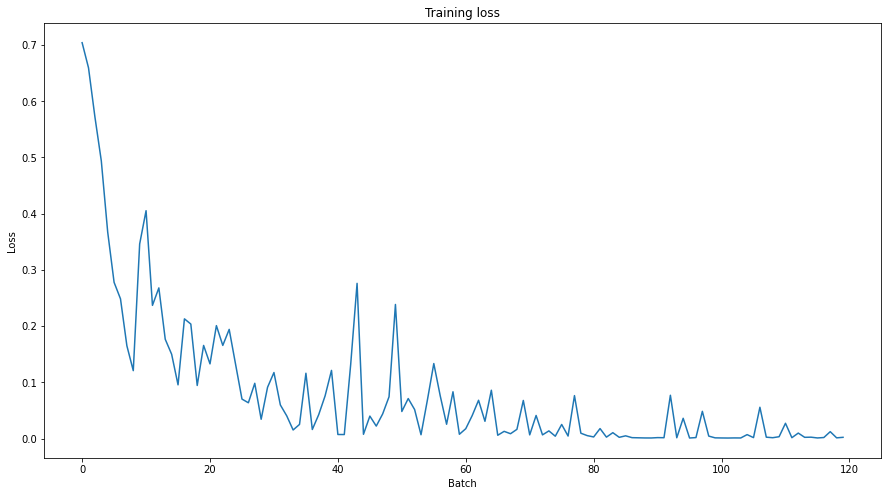

In [25]:
# BERT training loop
for _ in trange(epochs, desc="Epoch"):  
  
  ## TRAINING
  torch.cuda.empty_cache()
  # Set our model to training mode
  model.train()  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()
    # Forward pass
    loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    train_loss_set.append(loss.item())    
    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1
  print("Train loss: {}".format(tr_loss/nb_tr_steps))
       
  ## VALIDATION

  # Put model in evaluation mode
  model.eval()
  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0
  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)    
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1
  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

# plot training performance
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

In [ ]:
for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)    
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1
print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

Validation Accuracy: 0.9598524305555555


In [ ]:
for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)  
      logits = logits.detach().cpu().numpy()  
      print(logits)

[[-3.9855583  4.2861137]
 [-3.9549735  4.2927947]
 [ 2.9904273 -3.991263 ]
 [-3.6963713  3.9528513]
 [-3.9357936  4.2624006]
 [ 3.2469459 -4.429582 ]
 [ 3.169044  -4.205132 ]
 [ 3.2640972 -4.2533   ]
 [ 3.0694711 -4.082383 ]
 [ 3.2507718 -4.4401855]
 [-3.655454   3.9838357]
 [ 3.1892037 -4.2346997]
 [ 3.1176307 -4.181471 ]
 [ 3.2427707 -4.3988924]
 [ 3.3132508 -4.4955006]
 [-4.0052423  4.3291554]
 [ 3.1535673 -4.248223 ]
 [-3.9959354  4.33079  ]
 [ 3.261915  -4.414614 ]
 [-3.929769   4.27026  ]
 [ 3.3188996 -4.36807  ]
 [-4.014559   4.3530836]
 [ 2.4089046 -3.259534 ]
 [ 3.222236  -4.3073425]
 [ 3.229653  -4.289955 ]
 [-4.0115933  4.3471146]
 [ 3.3748486 -4.5728526]
 [-4.0013967  4.309912 ]
 [ 3.1488085 -4.1703925]
 [ 3.2804427 -4.403388 ]
 [-4.0019727  4.3418217]
 [-3.2580976  3.4712772]
 [ 3.3699987 -4.509061 ]
 [ 1.0933951 -1.5356572]
 [-3.963366   4.2784004]
 [-3.9217448  4.2490487]
 [ 2.3547418 -3.2216558]
 [ 3.1400428 -4.230242 ]
 [-2.1489205  2.2680924]
 [-3.9809582  4.3109617]


In [ ]:
predicted_class = []
for x in range(len(logits)):
  if(logits[x][0]>0):
    abc=0
  else:
    abc=1
  predicted_class.append(abc)
predicted_class = np.array(predicted_class)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(label_ids, predicted_class))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.90      1.00      0.95         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(label_ids, predicted_class))

[[8 1]
 [0 9]]


In [32]:
validation_df_1 = pd.read_excel("5000_new_Articles.xlsx")
validation_df_2 = pd.read_excel("other_5000_new_Articles.xlsx")
validation_df = pd.concat([validation_df_1, validation_df_2])
validation_df = validation_df[['Title','abstract']]

Abstracts = validation_df['Title']

tokenizer = BertTokenizer.from_pretrained('biobert_v1.1_pubmed', do_lower_case=True)

tokenized_texts = list(map(lambda t: ['[CLS]']+tokenizer.tokenize(cleanText(t))+['[SEP]'] , Abstracts))
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

Tokenize the first sentence:
['[CLS]', 'es', '##cher', '##ichi', '##a', 'co', '##li', 'segments', 'its', 'controls', 'on', 'carbon', '-', 'dependent', 'gene', 'expression', 'into', 'global', 'and', 'specific', 'regulations', '[SEP]']


In [33]:
max_len = 100
input_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, tokenized_texts)),
                          maxlen=max_len, dtype="long", truncating="post", padding="post")

In [35]:
attention_masks = []

for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

In [37]:
len(validation_masks)

466

In [38]:
batch_size = 64
validation_inputs = torch.tensor(input_ids)
validation_masks = torch.tensor(attention_masks, dtype=torch.long)

# Create an iterator of our data with torch DataLoader 

validation_data = TensorDataset(validation_inputs, validation_masks)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [50]:
all_predictions=[]
for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)  
      logits = logits.detach().cpu().numpy()  
      predicted_class = []
      for x in range(len(logits)):
        if(logits[x][0]>0):
          abc=0
        else:
          abc=1
        all_predictions.append(abc)

In [51]:
len(all_predictions)

10000

In [53]:
validation_df["target"]=all_predictions

In [54]:
validation_df

,Title,abstract,target
0,Escherichia coli segments its controls on carb...,How bacteria adjust gene expression to cope wi...,1
1,LC-MS/MS-based metabolic profiling of Escheric...,Escherichia coli is frequently exploited for g...,0
2,Reprogramming of gene expression in Escherichi...,Previous studies revealed important roles of s...,0
3,Development of Escherichia coli-based gene exp...,Aims: The impact of municip...,0
4,Enhanced Phenyllactic Acid Production in Esche...,3-Phenyllactic acid (PhLA) is useful as a star...,0
...,...,...,...
4995,The promiscuous phosphomonoestearase activity ...,Membrane transport P-type ATPases display two ...,0
4996,The CpxR/CpxA two-component system up-regulate...,We demonstrate that the twin arginine transloc...,1
4997,Helicobacter pylori single-stranded DNA bindin...,"Helicobacter pylori, an important bacterial pa...",0
4998,Global gene expression during stringent respon...,Background: The stringent r...,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


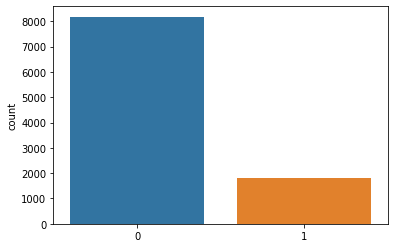

In [57]:
import seaborn as sns
sns.countplot(all_predictions)

In [58]:
validation_df.to_excel("Predicted_classification_10000.xlsx")